## How to know the popular people names and show names  in the video description?

In [158]:
import warnings
warnings.filterwarnings('ignore')
%xmode verbose

import nltk
#nltk.download('punkt')#Punkt Sentence Tokenizer
#nltk.download('averaged_perceptron_tagger')#averaged_perceptron_tagger is used for tagging words with their parts of speech (POS)
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('tagsets')
#nltk.download('large_grammars')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk #Use NLTK’s currently recommended named entity chunker to chunk the given list of tagged tokens.


Exception reporting mode: Verbose


In [195]:
sentence = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
ne_tree = ne_chunk(pos_tag(word_tokenize(sentence)))
type(ne_tree)
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [196]:
def preprocess(sentence):
    tokens = word_tokenize(sentence)
    pos = pos_tag(tokens)
    return pos

In [197]:
sentence = preprocess(sentence)

- Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.
- Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [171]:
pattern = r"NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sentence)
#nltk.help.upenn_tagset('VBD')

In [193]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


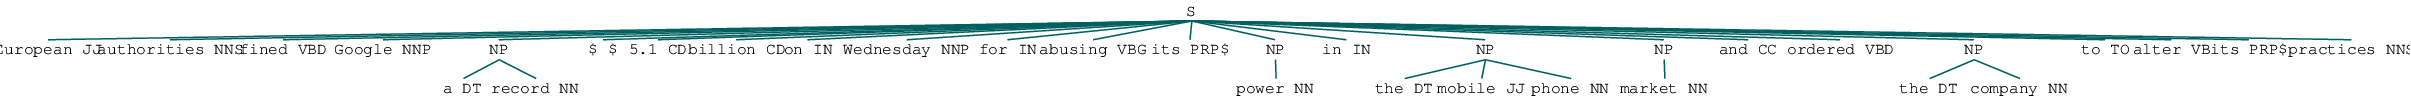

In [199]:
cs

## IOB Tags

**What it means ?**
- B-NP : beginning of a noun phrase
- I-NP : descibes that the word is inside of the current noun phrase.
- O : end of the sentence.
- B-VP and I-VP : beginning and inside of a verb phrase.

*conlltags2tree:- Convert the CoNLL IOB format to a tree.*

*tree2conlltags:- Reverse*

In [129]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [133]:
import spacy
from spacy import displacy
from collections import Counter
#python -m spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()

In [134]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [139]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


In [144]:

from bs4 import BeautifulSoup
import requests
import re

In [147]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html)
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [148]:

ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

160

In [149]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 41,
         'PERSON': 75,
         'DATE': 25,
         'CARDINAL': 4,
         'GPE': 9,
         'NORP': 5,
         'ORDINAL': 1})

In [150]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 29), ('F.B.I.', 19), ('Trump', 12)]

In [151]:
sentences = [x for x in article.sents]
print(sentences[20])

A spokeswoman for the F.B.I. did not respond to a message seeking comment about why Mr. Strzok was dismissed rather than demoted.


In [152]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

In [153]:
displacy.render(nlp(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})

In [154]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[20])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('spokeswoman', 'NOUN', 'spokeswoman'),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('respond', 'VERB', 'respond'),
 ('message', 'NOUN', 'message'),
 ('seeking', 'VERB', 'seek'),
 ('comment', 'NOUN', 'comment'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('dismissed', 'VERB', 'dismiss'),
 ('demoted', 'VERB', 'demote')]

In [155]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'F.B.I.': 'ORG', 'Strzok': 'PERSON'}

In [156]:

print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

[(A, 'O', ''), (spokeswoman, 'O', ''), (for, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'ORG'), (did, 'O', ''), (not, 'O', ''), (respond, 'O', ''), (to, 'O', ''), (a, 'O', ''), (message, 'O', ''), (seeking, 'O', ''), (comment, 'O', ''), (about, 'O', ''), (why, 'O', ''), (Mr., 'O', ''), (Strzok, 'B', 'PERSON'), (was, 'O', ''), (dismissed, 'O', ''), (rather, 'O', ''), (than, 'O', ''), (demoted, 'O', ''), (., 'O', '')]


In [157]:
displacy.render(article, jupyter=True, style='ent')

# Reference:
*For Named Entity Recognition*
https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

*Chunking*
https://www.nltk.org/book/ch07.html